# EARLY DIABETES DETECTION

## MAIN OBJECTIVE
Build a classification model that predicts early onset of diabetes using health indicators

## SPECIFIC OBJECTIVES
- Can we predict whether a patient is likely to develop diabetes using health-related features such as glucose, BMI, and age?
- Which features have the greatest influence on diabetes prediction, and how can we interpret their impact?
- Can we improve predictive performance by tuning a decision Tree Classifier, and how does it compare to a simple baseline model?

## BUSINESS UNDERSTANDING
This project focuses on building a classification model to identify patients at risk of developing diabetes using health data such as glucose levels, BMI, and age.
The main stakeholders in this project are primary healthcare doctors and health insurers, who both benefit from the early detection of diabetes. 
Doctors can use the predictions to guide earlier interventions and to avoid missing cases, while insurers are interested in reducing healthcare costs through prevention.


## IMPORT LIBRARIES


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import warnings
warnings.filterwarnings("ignore")


In [9]:
#Load dataset
df = pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
pd.set_option('display.max_rows', None)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## EXPLORATORY DATA ANALYSIS

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#checking for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

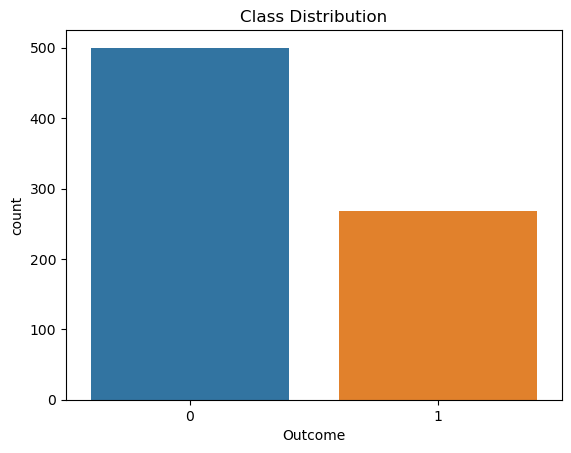

In [7]:
#checking class distribution
sns.countplot( data=df, x='Outcome')
plt.title('Class Distribution')
plt.show()

## DATA PREPARATION

In [22]:
#Some columns cannot have 0 values since it's impossible. We replace them with Nan
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols] = df[cols].replace(0, np.nan)

In [24]:
#check for missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [54]:
# Fill the Nan values with median 
df[cols] = df[cols].fillna(df[cols].median())

In [55]:
#check if there are still missing values present
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [65]:
#Train- Test split. stratify because of the imbalance
x = df.drop('Outcome', axis=1)
y= df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [66]:
#Feature scaling. Fit on the train set to avoid data leakage
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## MODELING

In [67]:
# 3. Train the model with class_weight since our outcome is moderately imbalanced
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(x_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [68]:
# 4. Using the trained model to predict class labels (0 or 1) on the test data.
y_pred = model.predict(x_test_scaled)


## EVALUATION

In [69]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.75      0.79       100
           1       0.60      0.70      0.65        54

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154



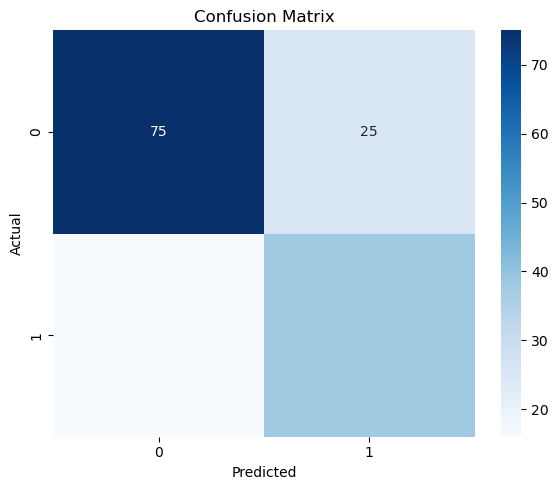

In [88]:

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
%matplotlib inline 
plt.show()



In [90]:
# 🌳 Step 6: Nonparametric Model - Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
print("\nDecision Tree Performance:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       100
           1       0.55      0.48      0.51        54

    accuracy                           0.68       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.67      0.68      0.68       154



In [93]:
# 📊 Step 8: Compare Models
models = ['Logistic Regression', 'Decision Tree']
accuracies = [accuracy_score(y_test, y_pred),
              accuracy_score(y_test, y_pred_dt)]

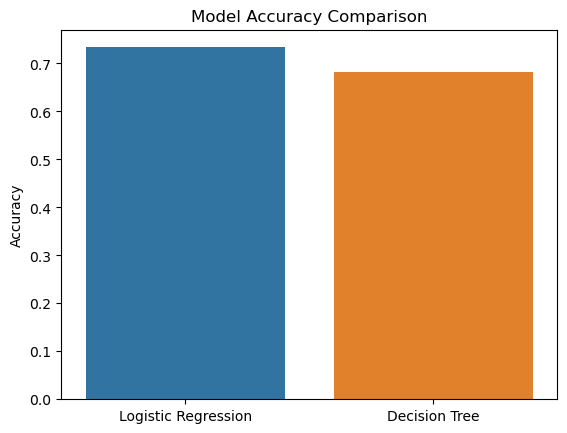

In [94]:
sns.barplot(x=models, y=accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()